<a href="https://colab.research.google.com/github/Fidaaz2521/Data_Science_Projects/blob/main/Zomato_cuisine_clustering_and_SentimentalAnalysis_unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**


In [51]:

# Import Libraries
import numpy as np
import pandas as pd
import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer


import warnings
warnings.filterwarnings('ignore')

In [52]:
#loading the dataset

rest_data = pd.read_csv("https://raw.githubusercontent.com/pvanand07/Zomato_Restaurant_Clustering_Unsupervised_ML/master/Zomato%20Restaurant%20Dataset/Zomato%20Restaurant%20names%20and%20Metadata.csv")
reviews = pd.read_csv("https://raw.githubusercontent.com/pvanand07/Zomato_Restaurant_Clustering_Unsupervised_ML/master/Zomato%20Restaurant%20Dataset/Zomato%20Restaurant%20reviews.csv")


In [53]:
rest_data.shape


(105, 6)

In [54]:
reviews.shape


(10000, 7)

In [55]:
rest_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [56]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [57]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [58]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


# **Total Unique values in each column**

In [59]:
rest_data.nunique()

,0
Name,105
Links,105
Cost,29
Collections,42
Cuisines,92
Timings,77


In [60]:
reviews.nunique()

,0
Restaurant,100
Reviewer,7446
Review,9364
Rating,10
Metadata,2477
Time,9782
Pictures,36


# **Finding total null values in each column**

In [61]:
rest_data.isnull().sum()

,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,0
Timings,1


In [62]:
reviews.isnull().sum()

,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0


<Axes: >

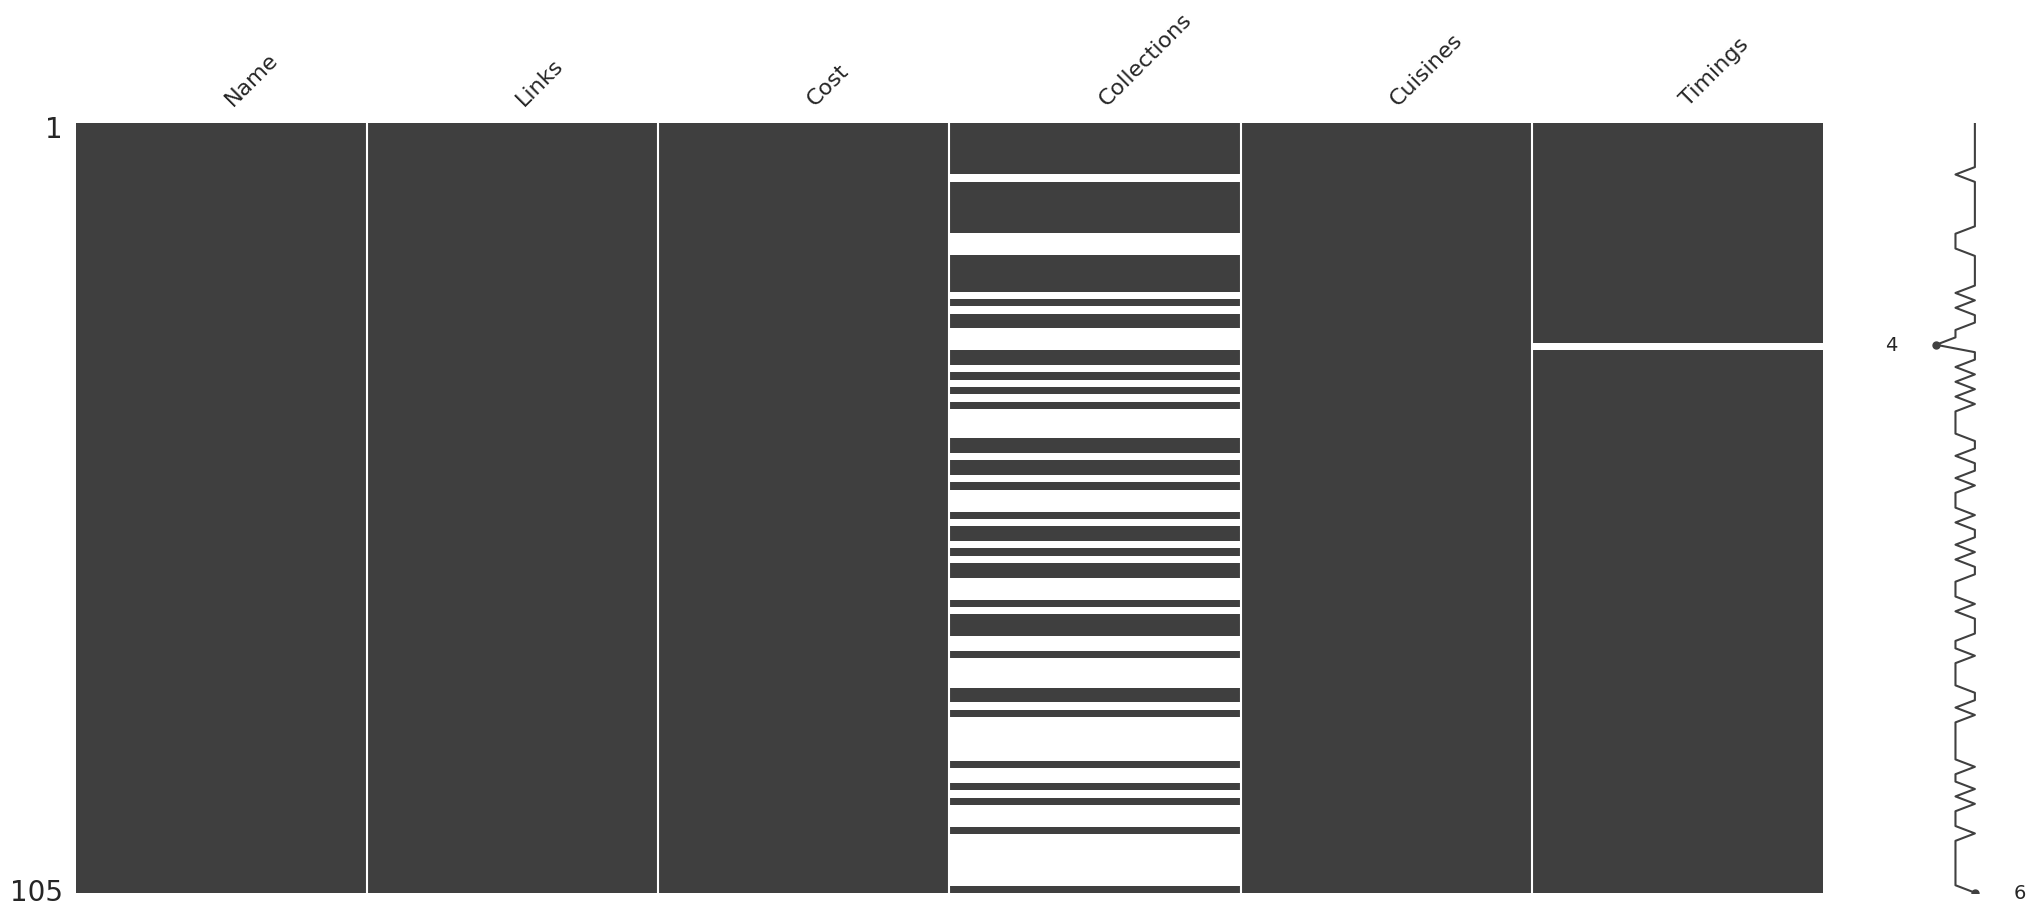

In [63]:
# Visualizing the missing values using missingno
missingno.matrix(rest_data)


<Axes: >

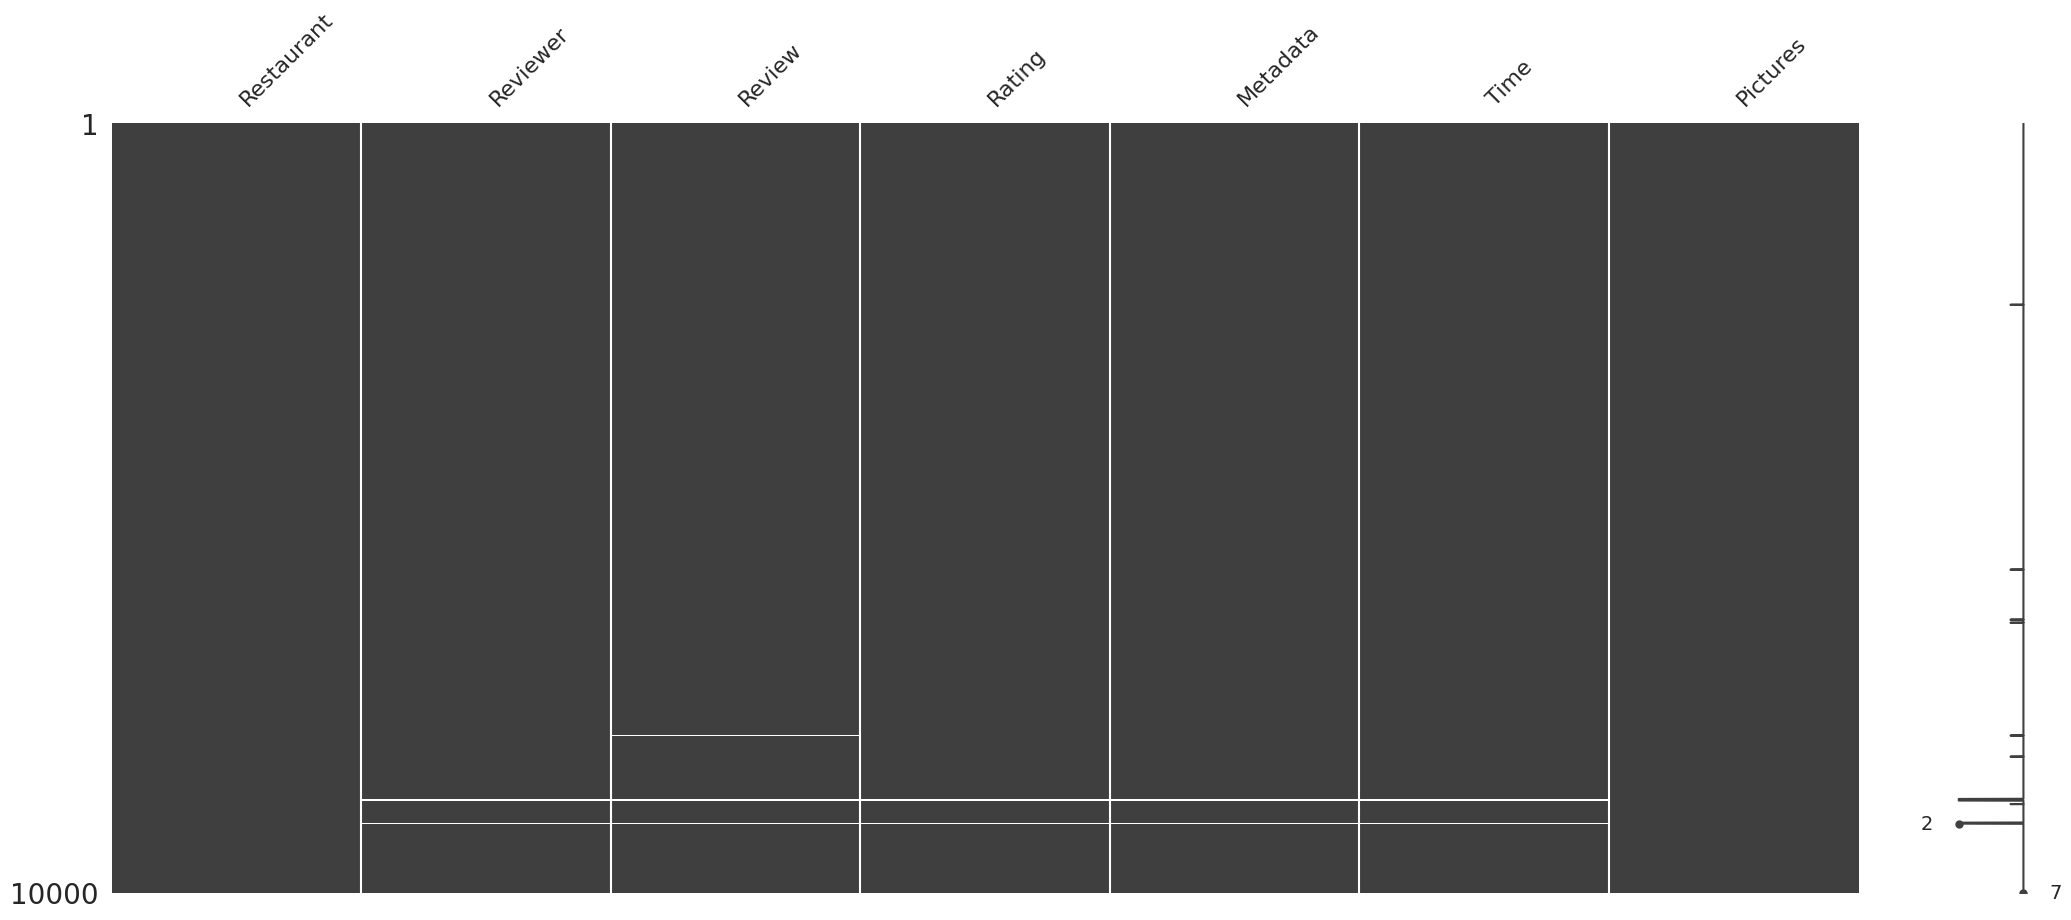

In [64]:
missingno.matrix(reviews)

# **Finding total duplicates in the dataset**

In [65]:
print("Duplicates in restaurant_data:",rest_data.duplicated().sum())
print("Duplicates in reviews:",reviews.duplicated().sum())

Duplicates in restaurant_data: 0
Duplicates in reviews: 36


# **Understanding the Variables**

In [66]:


# Dataset Columns
print("Features in restaurent data: ",rest_data.columns.tolist())
print("Features in review data: ",reviews.columns.tolist())

Features in restaurent data:  ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Features in review data:  ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [67]:

# Dataset Describe
rest_data.describe()


,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [68]:
reviews.describe(include = "all")

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


# **Data Wrangling**

In [69]:


#  Handling missing values

# Dropping collections column since most of the values are null
rest_data.drop("Collections",axis=1,inplace=True)

# Dropping remaining null values from restaurant_data and reviews since they are very few
rest_data.dropna(inplace=True)
reviews.dropna(inplace=True)

# Check for missing values After handling
print("Missing values in restaurant_data:")
print(rest_data.isnull().sum(),"\n")
print("Missing values in reviews:")
print(reviews.isnull().sum())

Missing values in restaurant_data:
Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64 

Missing values in reviews:
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


In [70]:

# Drop duplicate rows
rest_data.drop_duplicates(inplace=True)
reviews.drop_duplicates(inplace=True)
print("restaurant_data shape:",rest_data.shape)
print("reviews shape:",reviews.shape)

restaurant_data shape: (104, 5)
reviews shape: (9955, 7)


In [71]:

#extracting cuisines from the Cuisines(string) column and store as a list
print("Cuisines data Before preprocessing:\n")
print(rest_data.Cuisines[0])
print("\nCuisines data After preprocessing:\n")
print("",rest_data.Cuisines[0].lower().replace(" ","").split(","))

Cuisines data Before preprocessing:

Chinese, Continental, Kebab, European, South Indian, North Indian

Cuisines data After preprocessing:

 ['chinese', 'continental', 'kebab', 'european', 'southindian', 'northindian']


In [72]:
#applying the preprocessing steps on the Cuisines column
rest_data["Cuisines_list"] = rest_data.Cuisines.apply(lambda x: x.lower().replace(" ","").split(","))

#checking  the names of count of unique cuisines
cusines_set = set() #we use set() because a set does not take duplicate values, it will take only unique values and if duplicates are encountered ,it ignores them
for cuisines in rest_data.Cuisines_list:
  cusines_set.update(cuisines)
print("Total number of unique cuisines: ",len(cusines_set))
cusines_set

Total number of unique cuisines:  44


{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fastfood',
 'fingerfood',
 'goan',
 'healthyfood',
 'hyderabadi',
 'icecream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modernindian',
 'momos',
 'mughlai',
 'northeastern',
 'northindian',
 'pizza',
 'salad',
 'seafood',
 'southindian',
 'spanish',
 'streetfood',
 'sushi',
 'thai',
 'wraps'}

In [73]:

# Preprocess and convert the cost column to int data type
rest_data.Cost = rest_data.Cost.apply(lambda x: x.replace(",","")).astype(int)
rest_data.Cost

,Cost
0,800
1,800
2,1300
3,800
4,1200
...,...
100,600
101,200
102,500
103,250


In [74]:
rest_data.Cost.describe()


,Cost
count,104.000000
mean,861.057692
std,512.605979
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


In [75]:
rest_data[["Name","Cost","Cuisines_list"]]

,Name,Cost,Cuisines_list
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,1300,"[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"[asian, continental, northindian, chinese, med..."
...,...,...,...
100,IndiBlaze,600,"[fastfood, salad]"
101,Sweet Basket,200,"[bakery, mithai]"
102,Angaara Counts 3,500,"[northindian, biryani, chinese]"
103,Wich Please,250,[fastfood]


# **Data Wrangling on Reviews**

In [76]:
# replace non numbers with NAN
reviews.Rating = pd.to_numeric(reviews.Rating, errors='coerce')

In [77]:
reviews.Rating.fillna(reviews.Rating.mean(), inplace=True) #adding mean of rating in the places where it is NAN

In [78]:
'''
Purpose:
This block of code extracts the follower count from the Metadata column and prints how often each follower count occurs in the dataset.

Extracting Review Count Information:'''
# Checking the Metadata column to create a regex expression
followers = reviews.Metadata.apply(lambda x: x.split(",")[-1])
print(followers.apply(lambda x: x.split(" ")[-1]).value_counts())

review_count = reviews.Metadata.apply(lambda x: x.split(",")[0])
print(review_count.apply(lambda x: x.split(" ")[-1]).value_counts())


Metadata
Followers    6748
Follower     1633
Review        916
Reviews       658
Name: count, dtype: int64
Metadata
           8381
Review      916
Reviews     658
Name: count, dtype: int64


re: This is the Python regular expression (regex) module used to search and manipulate strings based on patterns.


In [79]:

import re
def extract_follower_and_review_count(text):

    # Define regular expressions for review and followers
    review_pattern = r'(\d+) Review'
    followers_pattern = r'(\d+) Follower'

    # Search for the review and followers using regex
    review_match = re.search(review_pattern, text)
    followers_match = re.search(followers_pattern, text)

    # Extract the review and followers values
    review = review_match.group(1) if review_match else 0
    followers = followers_match.group(1) if followers_match else 0
    return [review, followers]

extract_follower_and_review_count("1 Review , 22 Follower")

['1', '22']

In [80]:
reviews[['prev_reviews_count', 'followers_count']] = reviews['Metadata'].apply(extract_follower_and_review_count).apply(pd.Series)




In [81]:
reviews.drop('Metadata', axis=1, inplace=True)

In [82]:
merged_restaurant_data = pd.merge(reviews, rest_data[["Name","Cost","Cuisines_list"]], left_on='Restaurant', right_on='Name')
merged_restaurant_data


,Restaurant,Reviewer,Review,Rating,Time,Pictures,prev_reviews_count,followers_count,Name,Cost,Cuisines_list
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
...,...,...,...,...,...,...,...,...,...,...,...
9850,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,6/5/2016 0:08,0,53,54,Chinese Pavilion,1000,"[chinese, seafood]"
9851,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,6/4/2016 22:01,0,2,53,Chinese Pavilion,1000,"[chinese, seafood]"
9852,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,6/3/2016 10:37,3,65,423,Chinese Pavilion,1000,"[chinese, seafood]"
9853,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,5/31/2016 17:22,0,13,144,Chinese Pavilion,1000,"[chinese, seafood]"


#  Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

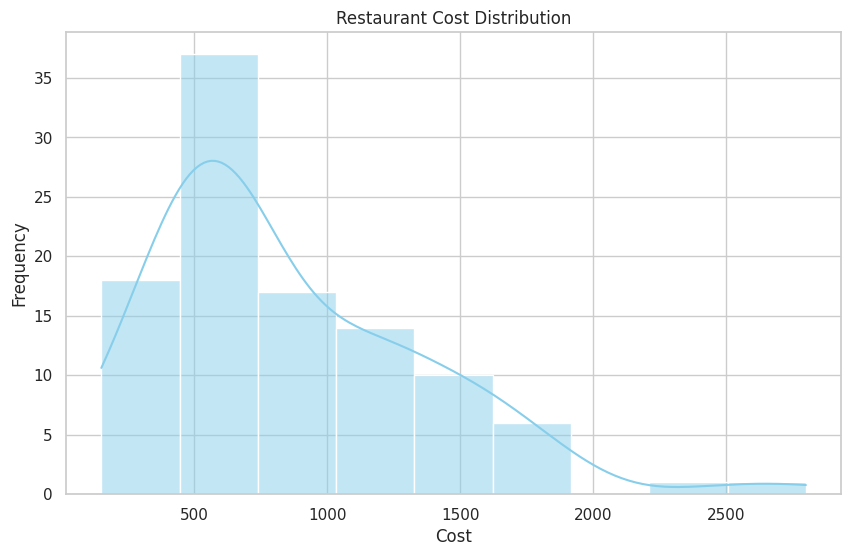

In [83]:
#Chart - 1 - Distribution of Cost (Univariate)

# Bivariate with Categorical - Numerical


plt.figure(figsize=(10, 6))
sns.histplot(data=rest_data, x='Cost', kde=True, color='skyblue')
plt.title('Restaurant Cost Distribution')
plt.xlabel('Cost')
plt.ylabel('Frequency')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




In [84]:
print("\n",rest_data['Cost'].describe())


 count     104.000000
mean      861.057692
std       512.605979
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64


# **Insights from the above chart:**
The average cost per person is 861 Rs With a std. deviation of 515 Rs.

Min observed cost is 150 and max is 2800


 count    9955.000000
mean        3.600261
std         1.483498
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64


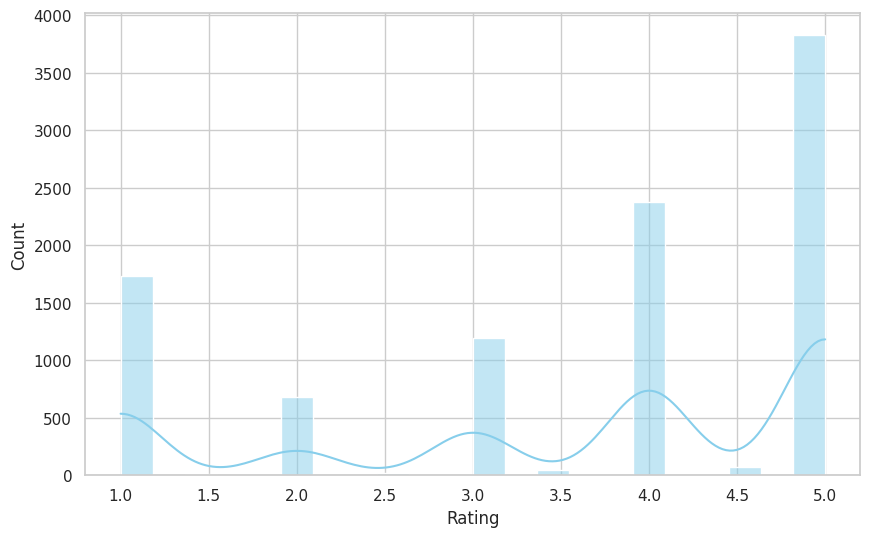

In [85]:
#Chart - 2 - Distribution of Rating (Univariate)

plt.figure(figsize=(10, 6))
sns.histplot(data = reviews, x = 'Rating', kde = True, color = 'skyblue')

print("\n",reviews['Rating'].describe())

# Insights from the above chart:

The average rating is 3.6 indicating a majority of postitive ratings.

We can see two peaks in the distribution at 1 and 5 indicating that customers tend to have strong opinions about their experiences, either very good or very bad, rather than neutral or average.

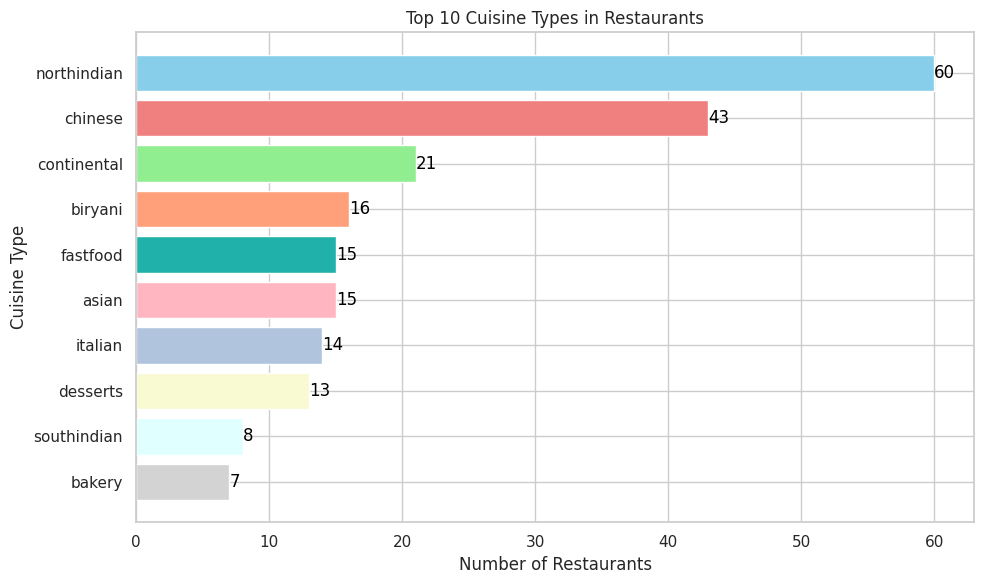

In [86]:
#Chart - 2 - Most popular cuisines (Univariate)

all_cuisines = []

for cuisine_list in rest_data.Cuisines_list:
    for cuisine in cuisine_list:
        all_cuisines.append(cuisine)

# Count the occurrences of each cuisine type
cuisine_counts = pd.Series(all_cuisines).value_counts()

# Choose the top N cuisine types to display on the y-axis
top_n = 10  # You can change this number as needed
cuisine_counts = cuisine_counts.head(top_n)

# custom color palette
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue', 'lightgoldenrodyellow', 'lightcyan', 'lightgray']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(cuisine_counts.index, cuisine_counts.values, color=colors)

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', ha='left', va='center', fontsize=12, color='black')

plt.title('Top {} Cuisine Types in Restaurants'.format(top_n))
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most common cuisine at the top

plt.tight_layout()
plt.show()

insights found from the chart?

Northindian seems to be the most popular cuisine and south indian and bakery to be the least popular

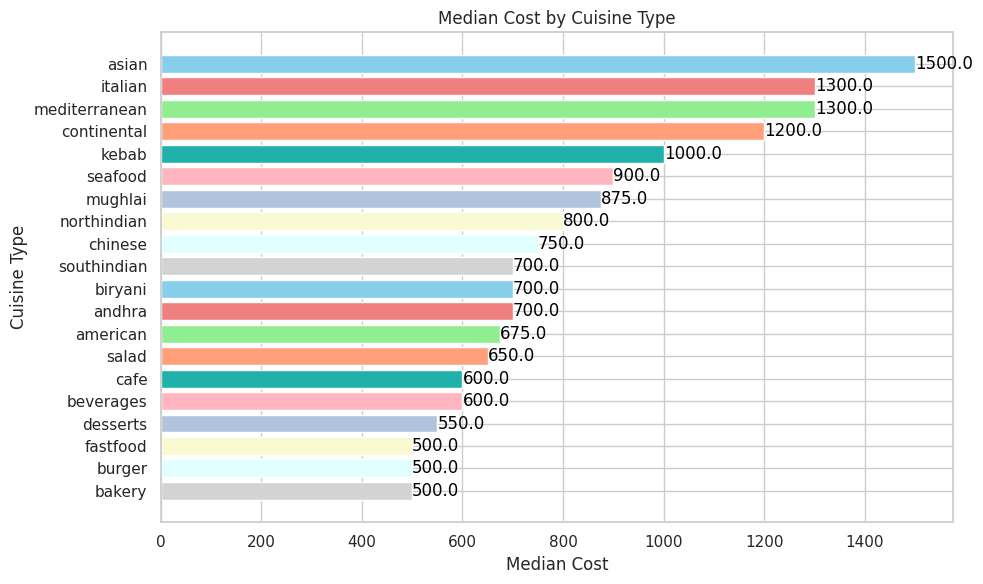

In [87]:
#Chart - 3 - Restaurant Costs vs cuisines
import pandas as pd

# Reset the index of rest_data before proceeding
rest_data = rest_data.reset_index(drop=True)

# Create a new DataFrame with cuisine types and corresponding costs
cuisine_cost_df = pd.DataFrame({
    'Cuisine Type': rest_data.Cuisines_list.explode(),
    'Cost': rest_data['Cost']
})


# Count the occurrences of each cuisine type and select the top 20
top_20_cuisines = cuisine_cost_df['Cuisine Type'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 cuisines
cuisine_cost_df_top_20 = cuisine_cost_df[cuisine_cost_df['Cuisine Type'].isin(top_20_cuisines)]

# Calculate the average cost for each cuisine type and sort by average cost
average_cost_by_cuisine = cuisine_cost_df_top_20.groupby('Cuisine Type')['Cost'].median().sort_values(ascending=False).reset_index()

# Custom color palette
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue', 'lightgoldenrodyellow', 'lightcyan', 'lightgray']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(average_cost_by_cuisine['Cuisine Type'], average_cost_by_cuisine['Cost'], color=colors)

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', ha='left', va='center', fontsize=12, color='black')

plt.title('Median Cost by Cuisine Type')
plt.xlabel('Median Cost')
plt.ylabel('Cuisine Type')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest median cost at the top

plt.tight_layout()
plt.show()




insight found from the chart?

From the above plot the median cost of cuisine is highest for asian followed by italian and mediterranean
With the lowest being fastfoods, burgers and bakery

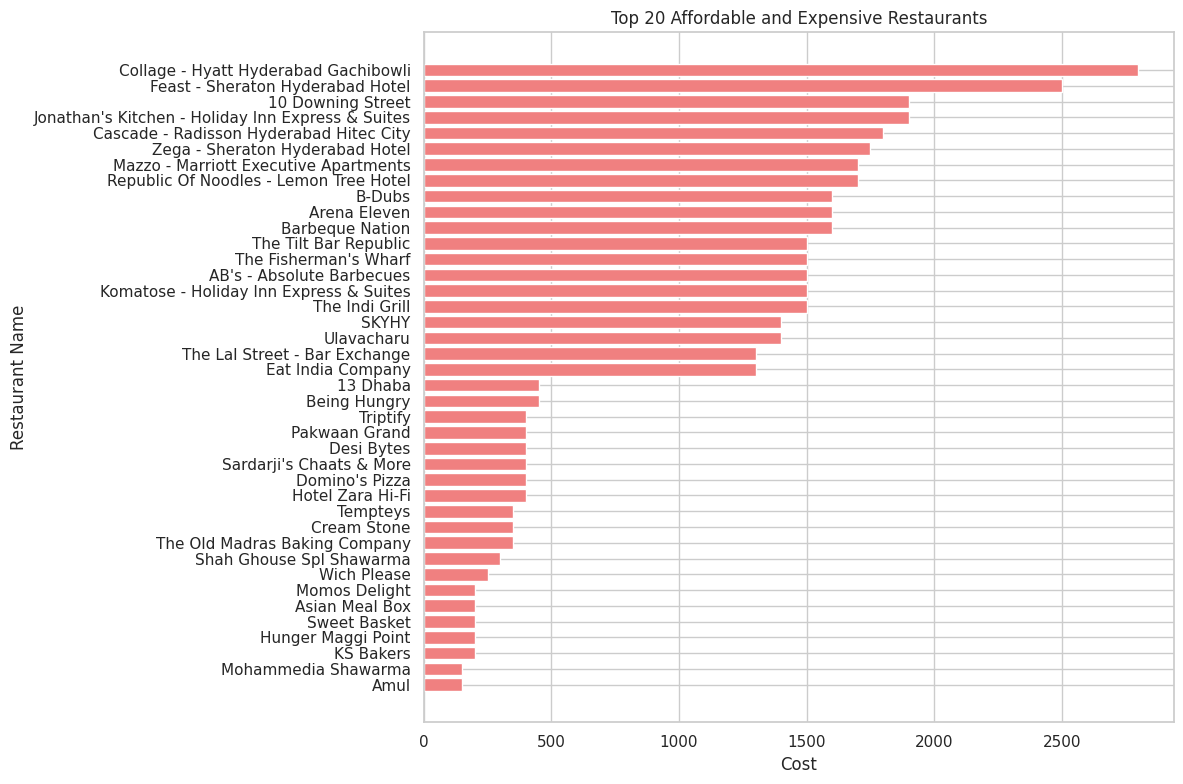


 Statistics for top 20 expensive restaurants
             Cost
count    20.00000
mean   1687.50000
std     374.82452
min    1300.00000
25%    1500.00000
50%    1600.00000
75%    1762.50000
max    2800.00000

 Statistics for top 20 affordable restaurants
             Cost
count   20.000000
mean   310.000000
std    104.629673
min    150.000000
25%    200.000000
50%    350.000000
75%    400.000000
max    450.000000


In [88]:
#Chart - 5 - Affordable and Expensive Restaurents (Bivariate)

# Sort the DataFrame by cost in ascending order (affordable to expensive)
affordable_restaurants = rest_data.sort_values(by='Cost', ascending=False).tail(20)

# Sort the DataFrame by cost in descending order (expensive to affordable)
expensive_restaurants = rest_data.sort_values(by='Cost', ascending=False).head(20)

# Concatenate both DataFrames to create a single DataFrame with the top 20 affordable and top 20 expensive restaurants
top_restaurants = pd.concat([expensive_restaurants,affordable_restaurants])

# Create a bar plot to visualize the top 20 affordable and top 20 expensive restaurants
plt.figure(figsize=(12, 8))
plt.barh(top_restaurants['Name'], top_restaurants['Cost'], color='lightcoral')
plt.title('Top 20 Affordable and Expensive Restaurants')
plt.xlabel('Cost')
plt.ylabel('Restaurant Name')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest cost at the top
plt.tight_layout()

plt.show()

print("\n Statistics for top 20 expensive restaurants")
print(expensive_restaurants.describe())
print("\n Statistics for top 20 affordable restaurants")
print(affordable_restaurants.describe())



 insight found from the chart?

The top expensive restaurants are, on average, about 5.4 times more costly than the top affordable restaurants.

This data could help consumers make decisions based on their budget.

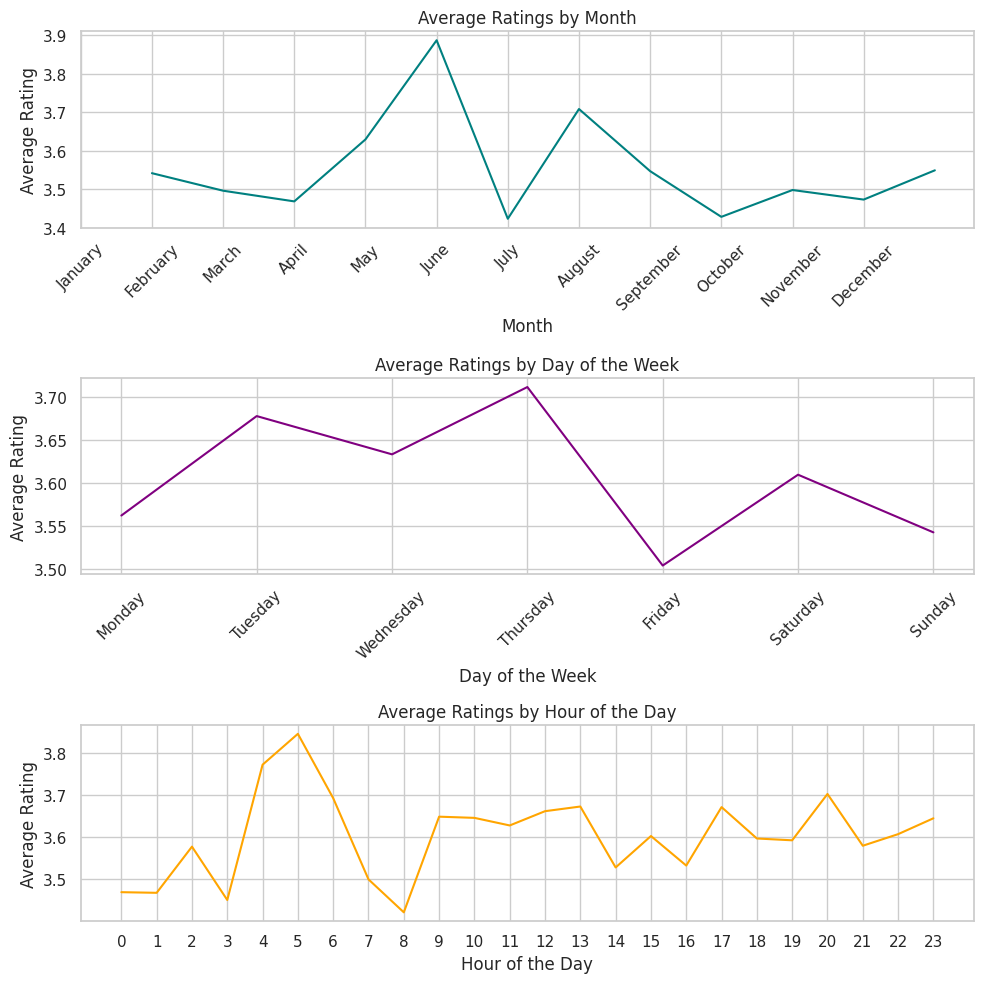

In [89]:
#Chart - 4 - Variation of Ratings W.R.T time (Bivariate with Categorical - Numerical)

import pandas as pd
import datetime as dt

# Converting 'Time' column to datetime
reviews['Time'] = pd.to_datetime(reviews['Time'])

# Extracting month, day of the week, and hour
reviews['Month'] = reviews['Time'].dt.month
reviews['DayOfWeek'] = reviews['Time'].dt.day_name()
reviews['Hour'] = reviews['Time'].dt.hour

# Seasonal Trend Analysis: Average Rating by Month
monthly_avg_rating = reviews.groupby('Month')['Rating'].mean()

# Weekly Trend Analysis: Average Rating by Day of the Week
weekly_avg_rating = reviews.groupby('DayOfWeek')['Rating'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Hourly Trend Analysis: Average Rating by Hour of the Day
hourly_avg_rating = reviews.groupby('Hour')['Rating'].mean()

# Plotting all three trends in a single figure with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Monthly Trend Plot
axs[0].plot(monthly_avg_rating, color='teal')
axs[0].set_title('Average Ratings by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average Rating')
axs[0].set_xticks(range(0, 12))
axs[0].set_xticklabels([dt.date(2000, m, 1).strftime('%B') for m in range(1, 13)])
axs[0].tick_params(axis='x', rotation=45)

# Weekly Trend Plot
axs[1].plot(weekly_avg_rating, color='purple')
axs[1].set_title('Average Ratings by Day of the Week')
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Average Rating')
axs[1].set_xticks(range(7))
axs[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axs[1].tick_params(axis='x', rotation=45)

# Hourly Trend Plot
axs[2].plot(hourly_avg_rating, color='orange')
axs[2].set_title('Average Ratings by Hour of the Day')
axs[2].set_xlabel('Hour of the Day')
axs[2].set_ylabel('Average Rating')
axs[2].set_xticks(range(0, 24))
axs[2].grid(True)

plt.tight_layout()
plt.show()

 insights found from the chart?

Average Ratings by Month:

There is a noticeable peak in June, indicating the highest average ratings occur in this month.
There are lower points, particularly noticeable in April and September, suggesting a potential seasonal impact on ratings.
Average Ratings by Day of the Week:

Ratings peak mid-week, particularly on Wednesday, and then there is a decline towards the weekend.
The lowest average ratings occur on Friday.
Average Ratings by Hour of the Day:

There are peaks in the early hours (around 5 AM), mid-morning (around 9 AM), and late evening (around 8 PM).
There are noticeable dips in the late morning (around 7-8 AM) and early evening (around 2-4 PM).
Business Implications:

Positive Impact: The insights could lead to targeted marketing during peak times, quality control measures when lower ratings are expected, and staffing adjustments to ensure service quality during critical hours or days.
Strategic Applications:

Seasonal Adjustments: The variation in monthly ratings could suggest that the restaurants should adjust their offerings or operations seasonally, perhaps offering summer specials or comfort food in colder months.

Weekly Planning: Understanding that ratings dip over the weekend could imply that customers have higher expectations or that there are operational challenges during these days.

Hourly Focus: The hourly variations might reflect changes in customer base or staff shifts. Special attention to service quality at known low points, and maintaining the high standards during the peaks, could enhance overall ratings.

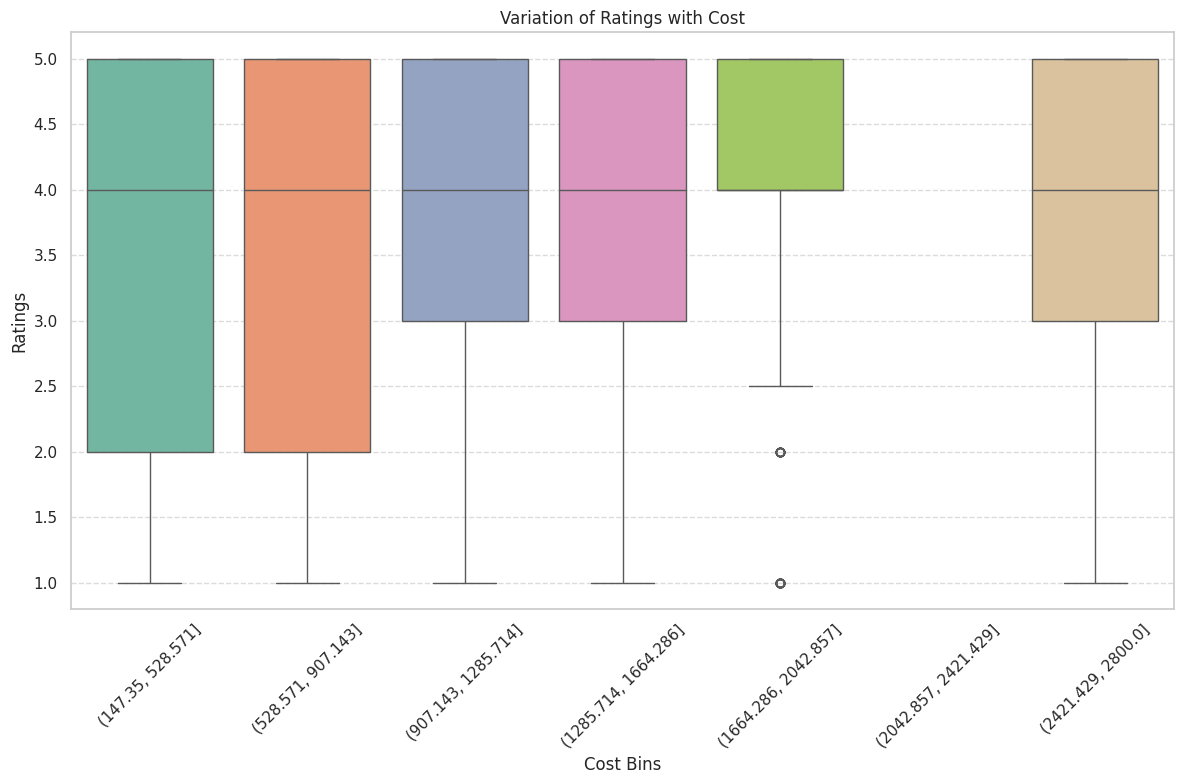

In [90]:
#Chart - 6 Variation of Ratings with Cost

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced styling

# Assuming you have already loaded your data and merged it as shown in your code

# Create 10 bins for the 'Cost' column
merged_restaurant_data['Cost_Bin'] = pd.cut(merged_restaurant_data['Cost'], bins=7)

# Set a custom color palette for the plot
colors = sns.color_palette("Set2")

# Create a box plot with seaborn for better styling
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set the style to whitegrid
sns.boxplot(x='Cost_Bin', y='Rating', data=merged_restaurant_data, palette=colors)
plt.xticks(rotation=45)
plt.title('Variation of Ratings with Cost')
plt.xlabel('Cost Bins')
plt.ylabel('Ratings')

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the plot further as needed, e.g., adjusting fonts, colors, etc.

plt.tight_layout()  # Ensure the plot is well-fit within the figure
plt.show()

insights found from the chart?

Higher Cost, Higher Ratings: The highest cost bin [(2421, 2800)] shows the highest median rating, which could suggest that more expensive restaurants tend to receive better ratings, possibly due to perceived quality, service, or experience.

Presence of Outliers: There are outliers in both the lower and higher cost bins, indicated by the dots outside the main "box" of the box plot. This indicates that there are some restaurants with ratings that are significantly lower than the typical range of ratings for their cost category.

Business Implications:

Positive Impact:

The presence of outliers suggests that there is an opportunity for improvement or differentiation for restaurants that are underperforming within their cost category.
Negative Impact:

Outliers, especially in the highest cost bin, suggest that high prices alone do not guarantee high ratings. Poor experiences at expensive restaurants may lead to significantly lower ratings due to higher customer expectations associated with higher costs.


# **Sentiment Analysis**




In [91]:
#Preprocess text for sentiment analysis

def clean_string(input_string):
    cleaned_string = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|\d+", "", input_string.lower())
    return cleaned_string

reviews['Review Cleaned'] = reviews['Review'].apply(clean_string)

This line uses the re.sub() function from the re (regular expressions) module to search for patterns in the string and replace them with an empty string "". This effectively removes unwanted parts of the text.
The regular expression is:
(@\[A-Za-z0-9]+): Matches mentions or usernames starting with @ followed by letters or numbers, e.g., @username.
([^0-9A-Za-z \t]): Matches any character that is not a letter, digit, space, or tab, removing special characters and punctuation.
(\w+:\/\/\S+): Matches URLs starting with something like http:// or https://.
^rt: Matches "rt" at the start of the string, often indicating a "retweet" in social media posts.
http.+?: Matches any URL-like string starting with "http" (an alternative catch-all for URLs).
\d+: Matches numeric digits.
input_string.lower(): Converts the input string to lowercase, ensuring case insensitivity.
The cleaned result is stored in cleaned_string.

# **Calculate sentiment polarity using TextBlob**
TextBlob is a Python library for processing textual data. It provides simple APIs for common natural language processing (NLP) tasks. It is built on top of the NLTK (Natural Language Toolkit) and Pattern libraries, making it easy to perform tasks like part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

TextBlob can analyze the sentiment of text, providing a polarity score (ranging from -1 to 1) and a subjectivity score (ranging from 0 to 1).

In [92]:

import pandas as pd
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying the function to the review column
reviews['Sentiment'] = reviews['Review Cleaned'].apply(get_sentiment)

# Classifying sentiments into positive, negative, and neutral
reviews['Sentiment_Type'] = reviews['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Displaying the first few rows with the sentiment analysis
reviews[['Review Cleaned', 'Sentiment', 'Sentiment_Type']].head()

,Review Cleaned,Sentiment,Sentiment_Type
0,the ambience was good food was quite good had...,0.660000,positive
1,ambience is too good for a pleasant evening se...,0.606667,positive
2,a must try great food great ambience thnx for ...,0.550000,positive
3,soumen das and arun was a great guy only becau...,0.500000,positive
4,food is goodwe ordered kodi drumsticks and bas...,0.577500,positive


# **Extract Noun from each review for further analysis**

spaCy is an advanced and efficient Python library for Natural Language Processing (NLP). It is widely used in the industry for building robust NLP applications because of its speed and accuracy. Unlike simpler NLP libraries like TextBlob, spaCy is designed for larger-scale production environments and provides tools for deep linguistic analysis.

In [93]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_food_entities(review):
    doc = nlp(review)
    # Extract noun from text using spacy
    food_entities = [token.text for token in doc if token.pos_ == 'NOUN']
    return food_entities

# Apply the function to each review
reviews['Food_Entities'] = reviews['Review Cleaned'].apply(extract_food_entities)

# Display the first few rows with extracted food entities
reviews[['Review Cleaned', 'Food_Entities']].head()

,Review Cleaned,Food_Entities
0,the ambience was good food was quite good had...,"[ambience, food, lunch, cost, place, sate, bru..."
1,ambience is too good for a pleasant evening se...,"[ambience, evening, service, food, experience,..."
2,a must try great food great ambience thnx for ...,"[food, ambience, thnx, service, pradeep, recom..."
3,soumen das and arun was a great guy only becau...,"[arun, guy, behavior, sincerety, food, course,..."
4,food is goodwe ordered kodi drumsticks and bas...,"[food, drumsticks, basket, mutton, biryani, th..."


In [94]:

reviews['Food_Entities'].value_counts()

,count
Food_Entities,
[],766
[food],94
[delivery],83
[service],46
[taste],40
...,...
"[option, stars, experience, food, service, managers, people, speak, calls, order, swiggythey, delivery, guy, words, customers, delivery, partnerif, hotel, business, change, management, name, brand]",1
"[attitude, problem, receptionaccounts, person, food, nobdy, carestake, bills, food]",1
"[veg, time, place, wife, restaurant, haleem, veg, items]",1


# **Calculating the cumulative sentiment for each entity**

In [95]:
from collections import defaultdict

# Initialize dictionaries to hold the sum of values of sentiments for each food item
food_sentiment_counts = defaultdict(lambda: {'positive': 0, 'negative': 0, 'neutral': 0})

# Iterating through each review
for index, row in reviews.iterrows():
    sentiment = row['Sentiment_Type']
    sentiment_value = row['Sentiment']
    for food_item in row['Food_Entities']:
        # Get the cumulative sentiment value for this food item
        food_sentiment_counts[food_item][sentiment] += sentiment_value

# Now, food_sentiment_counts has the sentiment counts for each food item
food_sentiment_count_df = pd.DataFrame.from_dict(food_sentiment_counts, orient='index')
food_sentiment_count_df


,positive,negative,neutral
ambience,576.202063,-17.811802,0.0
food,1728.252658,-250.403071,0.0
lunch,133.341863,-14.057486,0.0
cost,25.226397,-2.545169,0.0
place,1684.695765,-110.149886,0.0
...,...,...,...
segregation,0.107800,0.000000,0.0
husbandthe,0.470000,0.000000,0.0
carvings,0.470000,0.000000,0.0
disappointthis,0.470000,0.000000,0.0


**Visualizing the results**

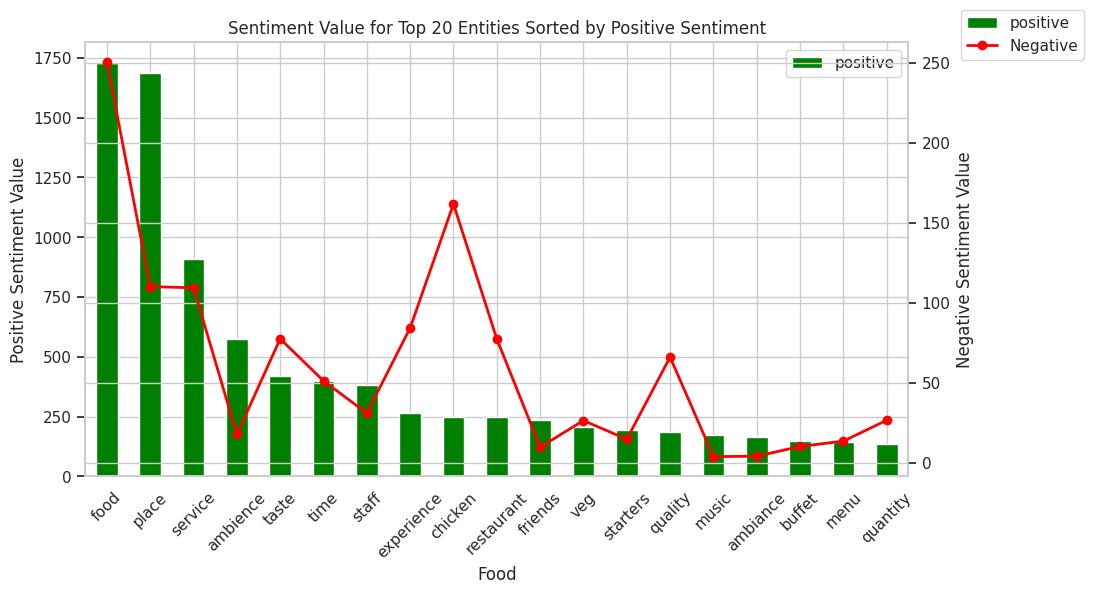

In [96]:



# Finding the threshold to filter the top values (greater than the 20th highest positive sentiment value)
threshold = food_sentiment_count_df['positive'].sort_values(ascending=False)[19]

# Filtering the DataFrame
top_sentiments_df = food_sentiment_count_df[food_sentiment_count_df['positive'] > threshold].sort_values(by='positive', ascending=False)


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart for positive counts and any other sentiment counts except negative
top_sentiments_df[['positive']].plot(kind='bar', stacked=True, ax=ax, color='green')

# Line chart for negative values
ax2 = ax.twinx()
(top_sentiments_df['negative']*(-1)).plot(kind='line', ax=ax2, color='red', marker='o', linewidth=2, label='Negative')

# Labels and legend
ax.set_xlabel('Food')
ax.set_ylabel('Positive Sentiment Value')
ax2.set_ylabel('Negative Sentiment Value')
ax.set_title('Sentiment Value for Top 20 Entities Sorted by Positive Sentiment')
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.set_xticklabels(top_sentiments_df.index, rotation=45)

plt.tight_layout()
plt.show()

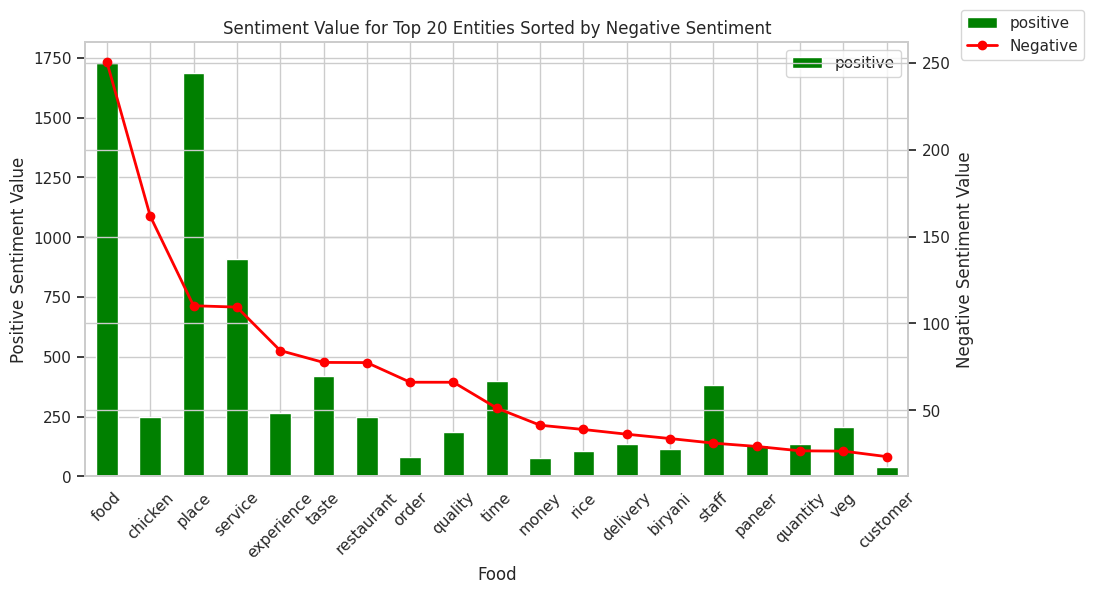

In [97]:


# Finding the threshold to filter the top values (greater than the 20th highest positive sentiment value)
threshold = food_sentiment_count_df['negative'].sort_values(ascending=True)[19]

# Filtering the DataFrame
top_sentiments_df = food_sentiment_count_df[food_sentiment_count_df['negative'] < threshold].sort_values(by='negative', ascending=True)


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart for positive counts and any other sentiment counts except negative
top_sentiments_df[['positive']].plot(kind='bar', stacked=True, ax=ax, color='green')

# Line chart for negative values
ax2 = ax.twinx()
(top_sentiments_df['negative']*(-1)).plot(kind='line', ax=ax2, color='red', marker='o', linewidth=2, label='Negative')

# Labels and legend
ax.set_xlabel('Food')
ax.set_ylabel('Positive Sentiment Value')
ax2.set_ylabel('Negative Sentiment Value')
ax.set_title('Sentiment Value for Top 20 Entities Sorted by Negative Sentiment')
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.set_xticklabels(top_sentiments_df.index, rotation=45)
plt.tight_layout()
plt.show()

Insights about potential impact on business:

Chicken as a High-Risk Item: While chicken has a relatively high positive sentiment, it has a disproportionately high negative sentiment compared to its positive score. This suggests that chicken dishes are crucial to get right, as they can significantly impact customer sentiment.

Consistency in Service: Service has a high positive sentiment, but also a notable negative sentiment. Consistent service quality could be a determining factor in overall customer satisfaction.

Experience and Taste: These are areas with substantial positive sentiment but also notable negative sentiment. This indicates that while good experiences and taste are praised, bad ones leave a strong negative impression on customers.

Quality Over Speed and Accuracy: Quality has a high positive sentiment and a relatively lower negative sentiment compared to order and time. This implies that customers value the quality of their food over the efficiency of service

Value for Money: Money has a low positive sentiment and a negative sentiment, which suggests that the perception of value for money is a concern for customers.

Operational Aspects: The negative sentiments for 'order', 'delivery', and 'time' are lower than for 'food', 'chicken', and 'place', but are still significant. This could indicate that operational efficiency in order processing and delivery is an area for improvement.

Staff Interaction: Staff have higher positive sentiment and comparatively lower negative sentiment. This suggests that good staff interactions can greatly enhance the customer experience, but poor interactions have less impact on negative sentiment compared to food quality or place.

Business Impact:

Positive Impact:

The data can guide targeted improvements in areas that significantly affect customer sentiment, like food quality and ambiance.
Understanding that quality is more important than speed could lead to prioritizing cooking quality over rapid service, improving overall satisfaction.
Since value for money is a concern, restaurants could review pricing strategies to better align with customer expectations.

Negative Impact:

Failing to address areas with high negative sentiment, especially food and place, could lead to customer loss and negative reviews.
Overlooking the importance of the chicken dishes and experience could disproportionately impact the business negatively due to their high negative sentiments relative to their positive values.
Overall, focusing on areas with high positive sentiment can reinforce strengths, while addressing areas with high negative sentiment can mitigate risks. This balance can create a positive business impact by improving customer satisfaction and loyalty.


# **Feature Engineering & Data Pre-processing**

In [98]:


# Creating a copy of the dataset for further feature engineering
from sklearn.preprocessing import MultiLabelBinarizer

# Create a MultiLabelBinarizer
mlb = MultiLabelBinarizer()
features = mlb.fit_transform(rest_data.Cuisines_list)

# Create a DataFrame with the cuisine labels
features_df = pd.DataFrame(features, columns=mlb.classes_)

# Add resataurant name and cost to the features dataFrame
features_df['Cost'] = rest_data['Cost']
features_df['Name'] = rest_data['Name']

#features_df['avg_rating'] = restaurant_data_ratings['Rating']
features_df.set_index('Name', inplace=True)
features_df


,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,...,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Cost
Name,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,800
Paradise,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,800
Flechazo,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1300
Shah Ghouse Hotel & Restaurant,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,800
Over The Moon Brew Company,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IndiBlaze,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,600
Sweet Basket,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
Angaara Counts 3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,500


In [99]:
features_df['Avg_Ratings'] = reviews.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False)

# Fill Missing Ratings and Cost values with mean
features_df['Avg_Ratings'].fillna(value = features_df['Avg_Ratings'].mean(), inplace = True)
features_df['Cost'].fillna(value = features_df['Cost'].mean(), inplace = True)

In [100]:
# Select only the cuisines that occure more than 7 times
selected_features = features_df.columns[features_df.sum(axis=0)>7].tolist()
selected_features

['asian',
 'biryani',
 'chinese',
 'continental',
 'desserts',
 'fastfood',
 'italian',
 'northindian',
 'southindian',
 'Cost',
 'Avg_Ratings']

# **ML Model Implementation**
**ML Model - 1 - Implementing K-Means**
1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Explanation of the ML Model and its Performance:
The ML model used is K-Means clustering. K-Means is an unsupervised learning algorithm used for clustering data points into K clusters based on similarity.

The performance of the K-Means model can be evaluated using two main metrics: inertia and silhouette score.

Inertia represents the sum of squared distances of samples to their closest cluster center. Lower inertia values indicate tighter clusters.
Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Higher silhouette scores indicate better-defined clusters.
By analyzing both metrics, we can determine the appropriate number of clusters that provide a good balance between tight clustering (low inertia) and well-separated clusters (high silhouette score).

1. Which Evaluation metrics did you consider for a positive business impact and why?
For a positive business impact, the evaluation metrics of interest may include:

Inertia: lower inertia values indicate tighter clusters. Which implies that restaurants within the same cluster are more similar to each other in terms of cuisines and other features, which could lead to more accurate recommendations or targeted promotions for customers.

Silhouette Score: This metric indicates how well-separated the clusters are. A higher silhouette score suggests that the clusters are well-defined and distinct, which could lead to better segmentation of restaurants and potentially more targeted marketing strategies.

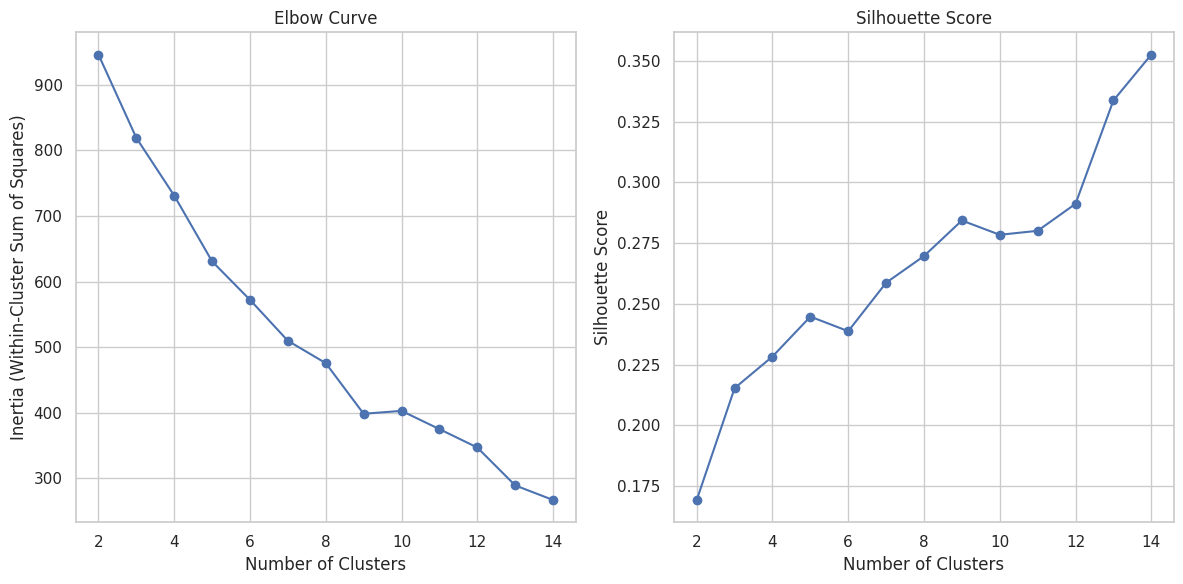

Optimal number of clusters: 14


In [101]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#X = features_df
X= StandardScaler().fit_transform(features_df[selected_features])

# Define a range of cluster numbers to try
cluster_range = range(2, 15)  # You can adjust this range as needed

# Initialize lists to store the inertia (within-cluster sum of squares) and silhouette scores
inertia_values = []
silhouette_scores = []

# Perform K-means clustering for each cluster number in the range
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters,init='k-means++', random_state=42)
    kmeans.fit(X)

    # Calculate the inertia and silhouette score for this cluster number
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')

# Plot the silhouette score to evaluate cluster quality
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Based on the plots, you can choose the optimal number of clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")

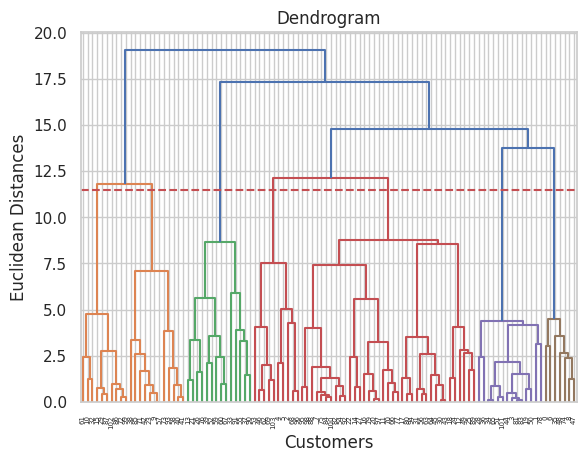

In [102]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=11.5, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line


# Selected No.of cluster = 7

In [105]:

# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering on the t-SNE transformed data
hc = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
features_df['Cluster'] = hc.fit_predict(X)



AgglomerativeClustering: Used to perform hierarchical clustering.

linkage='ward':

Determines how the clusters are merged.
ward minimizes the variance within clusters, producing compact and evenly sized clusters


In [106]:

results_df = features_df[selected_features+['Cluster']]
results_df


,asian,biryani,chinese,continental,desserts,fastfood,italian,northindian,southindian,Cost,Avg_Ratings,Cluster
Name,,,,,,,,,,,,
Beyond Flavours,0,0,1,1,0,0,0,1,1,800,4.280000,3
Paradise,0,1,1,0,0,0,0,1,0,800,4.700000,4
Flechazo,1,0,0,0,1,0,0,1,0,1300,4.660000,5
Shah Ghouse Hotel & Restaurant,0,1,1,0,0,0,0,1,0,800,3.210000,4
Over The Moon Brew Company,1,0,1,1,0,0,0,1,0,1200,4.340000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
IndiBlaze,0,0,0,0,0,1,0,0,0,600,3.604736,6
Sweet Basket,0,0,0,0,0,0,0,0,0,200,3.604736,0
Angaara Counts 3,0,1,1,0,0,0,0,1,0,500,3.604736,4


In [107]:
results_df_grouped = results_df.groupby('Cluster').sum()
results_df_grouped[['Cost','Avg_Ratings']] = results_df[['Cost','Avg_Ratings','Cluster']].groupby('Cluster').mean()
results_df_grouped


,asian,biryani,chinese,continental,desserts,fastfood,italian,northindian,southindian,Cost,Avg_Ratings
Cluster,,,,,,,,,,,
0,0,0,15,6,0,0,0,23,0,847.297297,3.625961
1,0,1,0,1,12,5,0,0,0,508.333333,3.614524
2,5,0,5,9,0,0,14,11,1,1532.142857,3.776429
3,0,1,5,2,0,0,0,7,7,671.428571,3.628571
4,0,14,12,1,0,0,0,13,0,650.000000,3.401698
5,10,0,5,2,1,0,0,3,0,1190.000000,3.853474
6,0,0,1,0,0,10,0,3,0,495.000000,3.292921


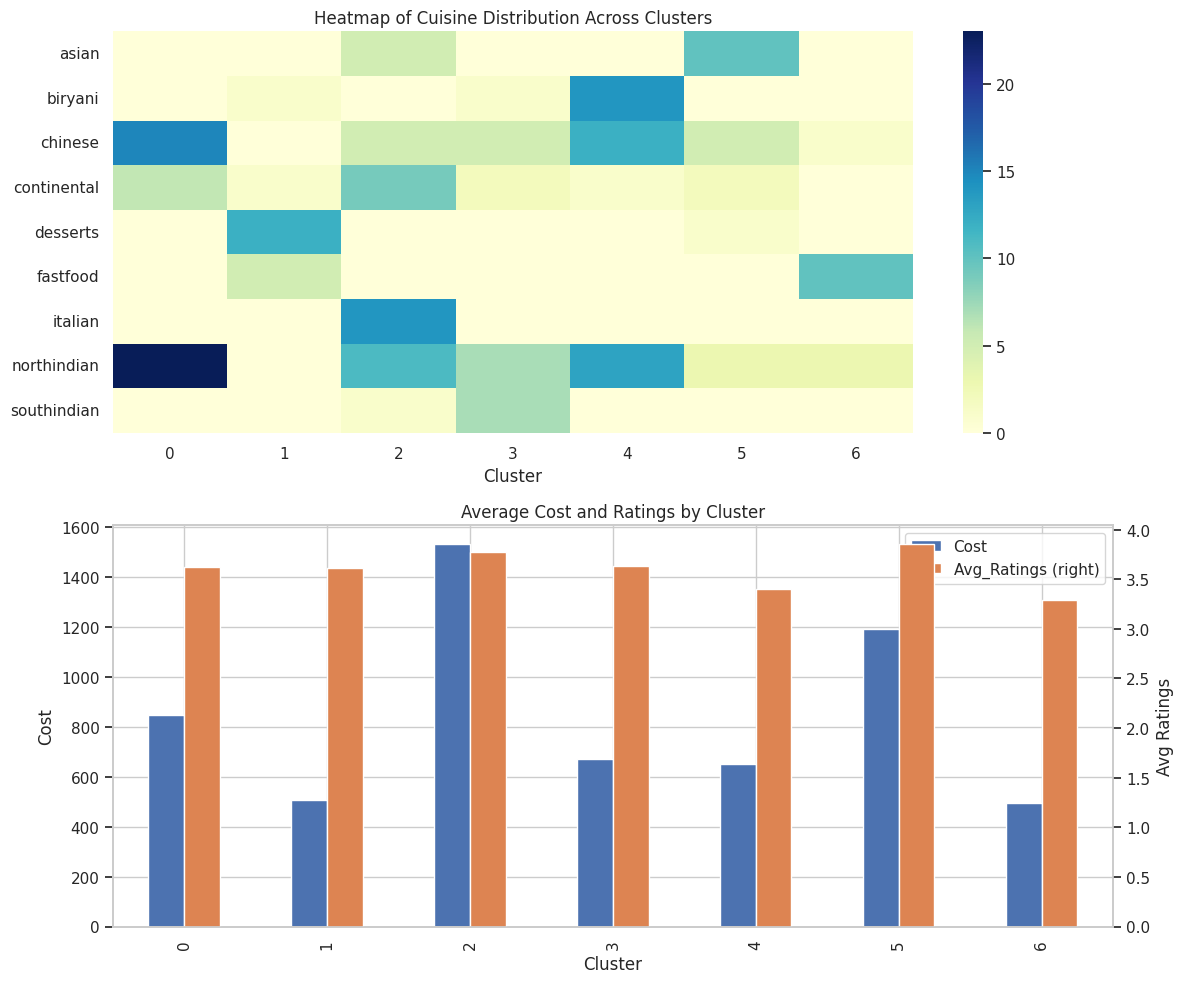

In [108]:

#@title Cuisine Distribution Across Clusters
# Preparing the data for heatmap
cuisine_data = results_df_grouped.drop(['Cost', 'Avg_Ratings'], axis=1)
cost_ratings_data = results_df_grouped[['Cost', 'Avg_Ratings']]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Heatmap for cuisine distribution
sns.heatmap(cuisine_data.T, cmap="YlGnBu", ax=ax[0])  # Transposing for better layout
ax[0].set_title('Heatmap of Cuisine Distribution Across Clusters')

# Grouped bar chart for cost and ratings
cost_ratings_data.plot(kind='bar', ax=ax[1], secondary_y='Avg_Ratings')
ax[1].set_title('Average Cost and Ratings by Cluster')
ax[1].set_ylabel('Cost')
ax[1].right_ax.set_ylabel('Avg Ratings')

plt.tight_layout()
plt.show()


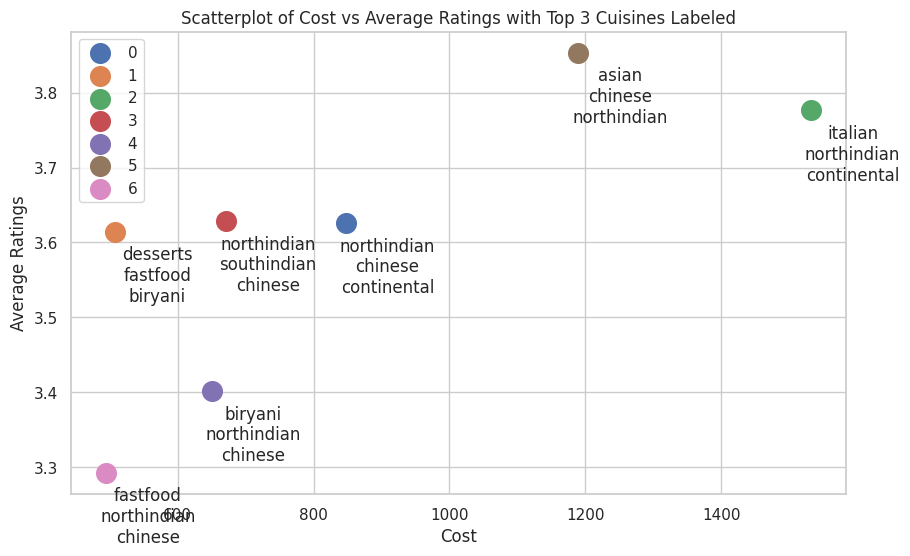

In [109]:
#@title Scatterplot of Cost vs Average Ratings with Top 3 Cuisines Labeled
df = results_df_grouped.reset_index()

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
for i, row in df.iterrows():
    plt.scatter(row['Cost'], row['Avg_Ratings'],s=200, label=f"{int(row['Cluster'])}")
    top_cuisines = row.drop(['Cluster', 'Cost', 'Avg_Ratings']).nlargest(3)
    i = 0
    for cuisine, value in top_cuisines.items():
        if value > 0:
            plt.annotate(cuisine, (row['Cost'], row['Avg_Ratings']), textcoords="offset points", xytext=(30,-20-i*15), ha='center')
            i+=1
plt.xlabel('Cost')
plt.ylabel('Average Ratings')
plt.title('Scatterplot of Cost vs Average Ratings with Top 3 Cuisines Labeled')
plt.legend()
plt.grid(True)
plt.show()

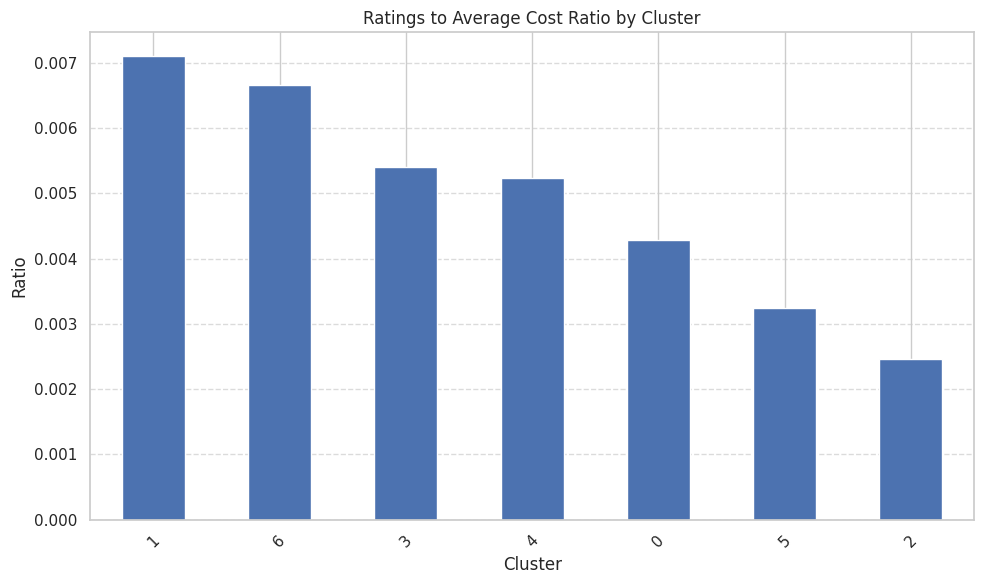

In [110]:
#@title Ratings to Average cost Ratio
ax = (cost_ratings_data.Avg_Ratings/cost_ratings_data.Cost).sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
# Adding labels and title
plt.title('Ratings to Average Cost Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

# **Conclusion**
# **Cluster Analysis**

Cluster 1 has low cost and, a high ratio of ratings to cost. This cluster has a variety of cuisines, such as desserts, continental, biryani, and Chinese, which may indicate that these restaurants offer a good balance of quality, price, and diversity.

Cluster 2 has the highest average cost and ratings, indicating that it consists of high-end restaurants that offer premium quality and service. The cuisine of this cluster is mainly Italian and Asian, suggesting that these are popular and profitable choices for upscale dining.

Cluster 5 has the second highest average ratings, but a lower cost than cluster 2. This cluster has a large proportion of Asian restaurants, indicating that this cuisine is well-liked and affordable by the customers. This cluster also has some continental and Chinese restaurants, which may appeal to a diverse range of tastes and preferences.

Cluster 4 has the lowest average ratings, but a moderate cost. This cluster is dominated by biryani and Chinese restaurants, which may indicate that these cuisines are oversaturated or underperforming in the market. The low ratings may also reflect the quality, service, or hygiene issues of these restaurants.

Cluster 6 has the lowest average cost, but also low ratings. This cluster consists mostly of fast food restaurants, which may cater to the budget-conscious or time-pressed customers. However, the low ratings may suggest that these restaurants do not offer much value or satisfaction to the customers.

Cluster 0 and 3 have similar costs and ratings, but different cuisines. Cluster 0 has mostly north Indian and Chinese restaurants, while cluster 3 has mostly south Indian and continental restaurants. These clusters may reflect the regional and cultural preferences of the customers, as well as the availability and competition of these cuisines in the market.


# **Summary of Business Case Solutions Based on Insights:**
**Optimizing Food and Place Experiences:**

Invest in improving the quality and ambiance of restaurants, focusing on addressing the high negative sentiment associated with food and place.


**Strategic Approach to Chicken Dishes:**

Implement a detailed review and improvement strategy specifically for chicken dishes, given their high impact on both positive and negative sentiments.


**Prioritizing Consistent Service Quality:**

Develop and implement training programs for staff to ensure consistent service quality, considering its influence on overall customer satisfaction.


**Balancing Experience and Taste:**

Conduct regular quality checks to maintain positive sentiments related to experience and taste, mitigating the negative impact of occasional lapses.


**Emphasizing Quality Over Speed and Accuracy:**

Adjust operational priorities to prioritize food quality over speed and accuracy, aligning with customer preferences.


**Addressing Value for Money Concerns:**

Review pricing strategies to align with customer expectations and communicate value-added services to address the negative sentiment associated with money.


**Strategic Approach to Cluster Insights:**

Provide insights to restaurants based on their cluster categorization, enabling them to tailor strategies for improvement or expansion.


**Encouraging Diversity in Cuisine Offerings:**

Encourage restaurants to diversify their cuisine offerings based on cluster insights to meet varied customer preferences.

#**These specific business case solutions derived from the insights aim to guide Zomato and its partner restaurants in addressing key areas of improvement, optimizing customer satisfaction, and fostering sustainable business growth.**